# Gaussian Naive Bayes Algorithm on Iris dataset

### Importing Libraries

In [23]:
import numpy as np
import pandas as pd 
import seaborn as sns

In [2]:
flower = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
flower

'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

In [3]:
headernames = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

### Reading CSV File

In [4]:
df = pd.read_csv(flower, names = headernames)
df

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
df.columns #checking the column names

Index(['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class'], dtype='object')

In [6]:
df.isna().sum()  #Checking NaN values

sepal-length    0
sepal-width     0
petal-length    0
petal-width     0
Class           0
dtype: int64

In [7]:
df.isnull().sum()  #Checking Null values

sepal-length    0
sepal-width     0
petal-length    0
petal-width     0
Class           0
dtype: int64

## Outliers Detection with Box plot

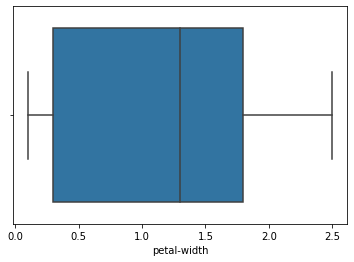

In [8]:
X = df[['sepal-length', 'sepal-width', 'petal-length', 'petal-width']]
y = df['Class']
ax = sns.boxplot(x=df["petal-width"])

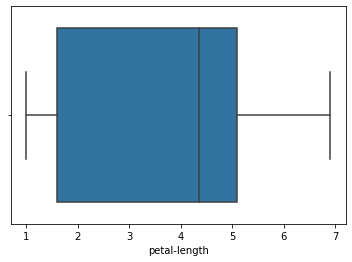

In [9]:
ax1 = sns.boxplot(x=df["petal-length"])

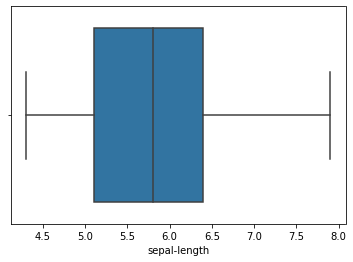

In [10]:
ax2 = sns.boxplot(x=df["sepal-length"])

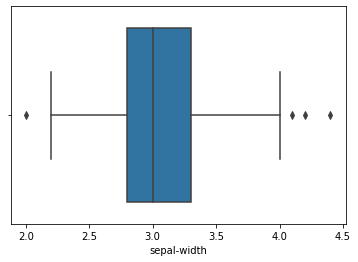

In [11]:
ax2 = sns.boxplot(x=df["sepal-width"])

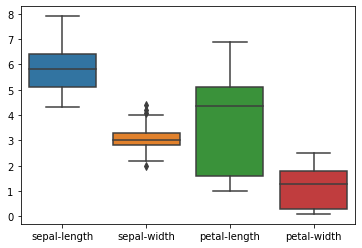

In [12]:
ax1 = sns.boxplot(data= X)

## Removing outliers

In [13]:
df = df[df['sepal-width'] > 2 ] 
df


,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [14]:
df = df[df['sepal-width'] < 4 ] 
df

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


## Pairplotting using Seaborn Library

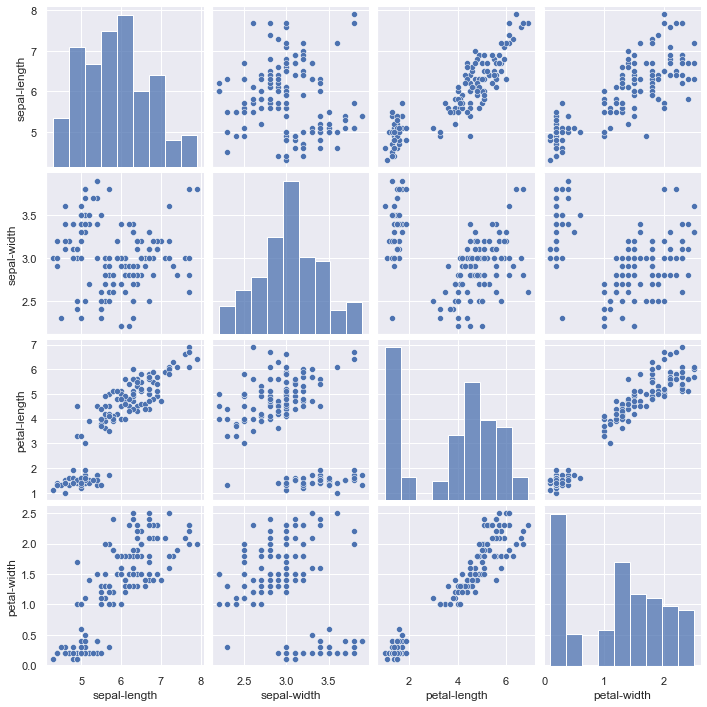

In [15]:
sns.set_theme(style="darkgrid")
sns.pairplot(df)

## Heatmap to show Correlation

<AxesSubplot:>

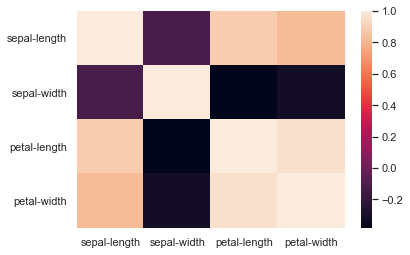

In [16]:
corrmat = df.corr()
sns.heatmap(corrmat)

## Feature Selection

**Selecting features to set the values for Dependent variable(y)and Independent variable(X)**

In [17]:
X = df[['sepal-length', 'sepal-width', 'petal-length', 'petal-width']]
y = df['Class']
X

,sepal-length,sepal-width,petal-length,petal-width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [18]:
 y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Class, Length: 145, dtype: object

## Data Splitting 

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=7)

## Fitting into the Model

In [20]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB().fit(X_train, y_train)

## Checking Accuracy Score

In [21]:
gnb.score(X_test, y_test)

0.9655172413793104

## Prediction result

In [22]:
predict = gnb.predict([[1.3, 4.4, 5, 2.3]])
predict

array(['Iris-virginica'], dtype='<U15')